## Packages import

In [1]:
import pandas as pd

from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

import os
import re

import seaborn as sns
sns.set(style="ticks")

import numpy as np
import scipy.stats as stats 


## Data import

### SCI data

For the current analysis, we focus on the SCI (defined as integrons with length >10 attC) of Vibrio cholerae. This definition also includes big CALINs. 

Cf Richard E, Darracq B, Littner E, et al. Cassette recombination dynamics within chromosomal integrons are regulated by toxin-antitoxin systems. Sci Adv. 2024;10(2):eadj3498. doi:10.1126/sciadv.adj3498 for further details

This dataset was generated in a previous study and is parsed from the output of IntegronFinder 2.0's predictions

In [2]:
vibrio_cholerae_SCIs= pd.read_pickle('./Notebook_resources/vibrio_cholerae_SCI.p')
vibrio_cholerae_SCIs

ID_short species_short              ID_replicon  ID_integron  \
73    VICH002.0321.00049       VICH002  VICH002.0321.00049.C002  integron_01   
74    VICH002.0321.00049       VICH002  VICH002.0321.00049.C002  integron_02   
208   VICH002.0321.00008       VICH002  VICH002.0321.00008.C002  integron_01   
284   VICH002.0321.00073       VICH002  VICH002.0321.00073.C002  integron_01   
351   VICH002.0321.00024       VICH002  VICH002.0321.00024.C002  integron_01   
...                  ...           ...                      ...          ...   
5959  VICH002.0321.00070       VICH002  VICH002.0321.00070.C002  integron_01   
5991  VICH002.0321.00027       VICH002  VICH002.0321.00027.C002  integron_01   
6030  VICH002.0321.00031       VICH002  VICH002.0321.00031.C002  integron_01   
6031  VICH002.0321.00031       VICH002  VICH002.0321.00031.C002  integron_02   
6032  VICH002.0321.00031       VICH002  VICH002.0321.00031.C002  integron_03   

          type  nb_attC  nb_protein                         ID_intrepon  
73    complete    224.0       246.0  integron_01VICH002.0321.00049.C002  
74       CALIN     20.0        24.0  integron_02VICH002.0321.00049.C002  
208   complete    207.0       245.0  integron_01VICH002.0321.00008.C002  
284   complete    171.0       211.0  integron_01VICH002.0321.00073.C002  
351   complete    227.0       260.0  integron_01VICH002.0321.00024.C002  
...        ...      ...         ...                                 ...  
5959  complete    169.0       215.0  integron_01VICH002.0321.00070.C002  
5991  complete     88.0        90.0  integron_01VICH002.0321.00027.C002  
6030  complete     17.0        21.0  integron_01VICH002.0321.00031.C002  
6031     CALIN     30.0        36.0  integron_02VICH002.0321.00031.C002  
6032     CALIN    121.0       136.0  integron_03VICH002.0321.00031.C002  

[100 rows x 8 columns]

This second dataset includes more details about the SCIs

In [3]:
detailed_vibrio_cholerae_SCI=pd.read_pickle('./Notebook_resources/detailed_vibrio_cholerae_SCI.p')
detailed_vibrio_cholerae_SCI

ID_integron              ID_replicon                        element  \
1482    integron_01  VICH002.0321.00049.C002  VICH002.0321.00049.C002_00254   
1483    integron_01  VICH002.0321.00049.C002  VICH002.0321.00049.C002_00255   
1484    integron_01  VICH002.0321.00049.C002                       attc_001   
1485    integron_01  VICH002.0321.00049.C002  VICH002.0321.00049.C002_00256   
1486    integron_01  VICH002.0321.00049.C002                       attc_002   
...             ...                      ...                            ...   
130228  integron_03  VICH002.0321.00031.C002                       attc_120   
130229  integron_03  VICH002.0321.00031.C002  VICH002.0321.00031.C002_01004   
130230  integron_03  VICH002.0321.00031.C002  VICH002.0321.00031.C002_01005   
130231  integron_03  VICH002.0321.00031.C002                       attc_121   
130232  integron_03  VICH002.0321.00031.C002  VICH002.0321.00031.C002_01006   

        pos_beg  pos_end  strand        evalue type_elt annotation  \
1482     309781   310743      -1  1.900000e-26  protein       intI   
1483     310995   311576       1           NaN  protein    protein   
1484     311571   311698       1  9.300000e-01     attC       attC   
1485     311820   312056       1           NaN  protein    protein   
1486     312076   312203       1  1.500000e-01     attC       attC   
...         ...      ...     ...           ...      ...        ...   
130228  1070301  1070429       1  8.800000e-01     attC       attC   
130229  1070391  1070909       1           NaN  protein    protein   
130230  1070900  1071022       1           NaN  protein    protein   
130231  1070910  1071035       1  9.200000e-05     attC       attC   
130232  1071120  1071623       1           NaN  protein    protein   

                        model      type default  distance_2attC  \
1482    intersection_tyr_intI  complete      No             NaN   
1483                      NaN  complete      No             NaN   
1484                   attc_4  complete      No             NaN   
1485                      NaN  complete      No             NaN   
1486                   attc_4  complete      No           378.0   
...                       ...       ...     ...             ...   
130228                 attc_4     CALIN      No           784.0   
130229                    NaN     CALIN      No             NaN   
130230                    NaN     CALIN      No             NaN   
130231                 attc_4     CALIN      No           481.0   
130232                    NaN     CALIN      No             NaN   

       considered_topology  
1482                  circ  
1483                  circ  
1484                  circ  
1485                  circ  
1486                  circ  
...                    ...  
130228                circ  
130229                circ  
130230                circ  
130231                circ  
130232                circ  

[30980 rows x 14 columns]

### Strains and phylogeny data

Strains to keep in the figure

In [4]:
strains_retained=np.array([i for i in set(np.arange(1,87))-{29,61,64}])

Strains in which the integron is in the wrong orientation

In [5]:
to_flip=[28, 29, 2, 79, 26, 34, 62, 35, 74, 81, 41, 61, 4, 76, 37, 60, 17, 71, 6, 40, 33]

Strains order in the phylogeny

In [6]:
phylogeny_order_dict= {69: 0,     42: 1,     28: 2,     86: 3,     80: 4,     66: 5,     65: 6,     1: 7,     79: 8,     57: 9,     18: 10,     63: 11,     62: 12,     60: 13,     41: 14,     26: 15,     73: 16,     72: 17,     68: 18,     23: 19,     17: 20,     5: 21,     84: 22,     83: 23,     82: 24,     81: 25,     67: 26,     25: 27,     22: 28,     21: 29,     9: 30,     12: 31,     16: 32,     70: 33,     20: 34,     10: 35,     7: 36,     14: 37,     13: 38,     15: 39,     8: 40,     78: 41,     77: 42,     37: 43,     11: 44,     85: 45,     76: 46,     75: 47,     74: 48,     71: 49,     6: 50,     2: 51,     43: 52,     30: 53,     3: 54,     58: 55,     31: 56,     59: 57,     27: 58,     19: 59,     40: 60,     35: 61,     33: 62,     38: 63,     39: 64,     45: 65,     44: 66,     24: 67,     56: 68,     46: 69,     4: 70,     54: 71,     53: 72,     55: 73,     36: 74,     49: 75,     52: 76,     51: 77,     50: 78,     48: 79,     47: 80,     34: 81,     32: 82}

For strains where the replicon origin overlaps with the integron, we manually decide where we want to recenter the replicon origin such that the integron is not split on the sides of the genome

In [7]:
recentering_dict={'VICH002.0321.00032.C002': 1165192,
 'VICH002.0321.00033.C002': 980327,
 'VICH002.0321.00035.C002': 1040169,
 'VICH002.0321.00081.C002': 1059741}

## Figure generation

In [8]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique),loc='center left', bbox_to_anchor=(1, 0.5))

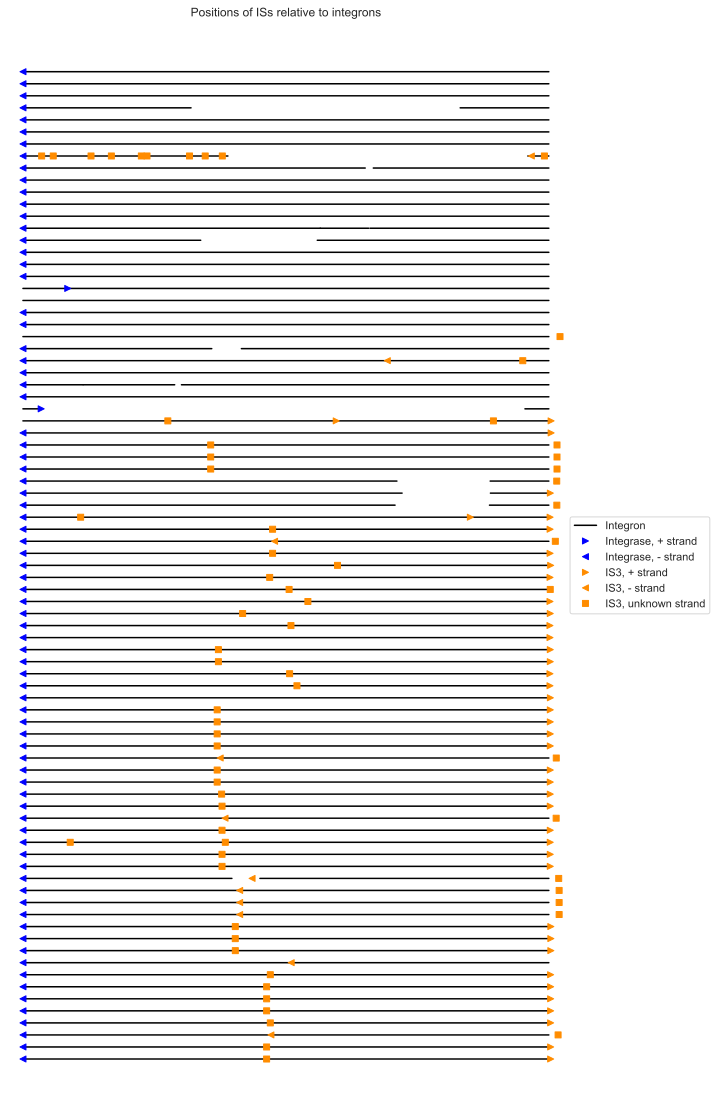

In [9]:
margin=0.03
flip_strand_dict = {'+': '-', '-': '+'}

fig, ax = plt.subplots(figsize=(10,20))
plt.xlim(0-margin,1+margin)

for prefix in vibrio_cholerae_SCIs.ID_replicon.unique():
    VICH_id=int(prefix.split('.')[2])
    if VICH_id in strains_retained:
        detailed_integron=detailed_vibrio_cholerae_SCI[detailed_vibrio_cholerae_SCI.ID_replicon==prefix]
        lstfile = pd.read_csv(f'./Notebook_resources/LSTINF/{prefix}.lst',sep='|',header=None) #A in-house equivalent of gff files 
        lstfile = lstfile[0].str.split(' ',expand=True).drop(lstfile[0].str.split(' ',expand=True).loc[:,12:],axis=1).join(lstfile[[1,2]].rename({1:12,2:13},axis=1))
        overlap_with_origin = (lstfile.iloc[-1][4] in detailed_integron.element.values) & (lstfile.iloc[0][4] in detailed_integron.element.values) # If the genome origin is in the integron

        if not overlap_with_origin :
            if VICH_id not in to_flip :
                ISEScan_infos=pd.read_csv(f'./Notebook_resources/ISScan_predictions/{prefix}.fst.tsv',sep='\t')
                ISEScan_IS3_infos=ISEScan_infos[ISEScan_infos.family=='IS3']
                isolate_integrons=detailed_integron.groupby('ID_integron').agg({'pos_beg':'min','pos_end':'max'})
                delta_factor=isolate_integrons.pos_beg.min()
                dividing_factor=isolate_integrons.pos_end.max()-isolate_integrons.pos_beg.min()
                normalized_isolate_integrons=(isolate_integrons.copy()-delta_factor)/dividing_factor

                normalized_detailed_integron=detailed_integron.copy()
                normalized_detailed_integron.loc[:,['pos_beg','pos_end']]=(normalized_detailed_integron.loc[:,['pos_beg','pos_end']]-delta_factor)/dividing_factor

                normalized_ISEScan_IS3_infos=ISEScan_IS3_infos.loc[:,['isBegin','isEnd','strand']]
                normalized_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]=(normalized_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]-delta_factor)/dividing_factor


                for ID_integron in normalized_isolate_integrons.index:
                    plt.plot([normalized_isolate_integrons.loc[ID_integron,'pos_beg'],normalized_isolate_integrons.loc[ID_integron,'pos_end']],[phylogeny_order_dict[VICH_id],phylogeny_order_dict[VICH_id]],label='Integron',color='black')
                plt.plot(normalized_detailed_integron[(normalized_detailed_integron.strand==1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_detailed_integron[(normalized_detailed_integron.strand==1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'])),'>',color='blue',label='Integrase, + strand')
                plt.plot(normalized_detailed_integron[(normalized_detailed_integron.strand==-1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_detailed_integron[(normalized_detailed_integron.strand==-1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'])),'<',color='blue',label='Integrase, - strand')

                plt.plot(normalized_ISEScan_IS3_infos[  normalized_ISEScan_IS3_infos['strand']=='+']['isBegin'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand']=='+'])),'>',color='darkorange',label='IS3, + strand')
                plt.plot(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand']=='-']['isBegin'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand']=='-'])),'<',color='darkorange',label='IS3, - strand')
                plt.plot(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand'].isna()]['isBegin'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand'].isna()])),'s',color='darkorange',label='IS3, unknown strand')
            else:

                replicon_size=int(pd.read_csv(f'./Notebook_resources/LSTINF/{prefix}.inf',sep='\n',header=None).loc[4].values[0].split('size: ')[1])
                flipped_integron=detailed_integron.copy()
                flipped_integron.loc[:,['pos_beg','pos_end']]=replicon_size-flipped_integron.loc[:,['pos_beg','pos_end']]+1
                flipped_integron.loc[:,'strand']=-1*flipped_integron.loc[:,'strand']

                ISEScan_infos=pd.read_csv(f'./Notebook_resources/ISScan_predictions/{prefix}.fst.tsv',sep='\t')
                ISEScan_IS3_infos=ISEScan_infos[ISEScan_infos.family=='IS3']
                flipped_ISEScan_IS3_infos=ISEScan_IS3_infos.copy()
                flipped_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]=replicon_size-flipped_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]+1
                flipped_ISEScan_IS3_infos.loc[:,'strand']=flipped_ISEScan_IS3_infos.loc[:,'strand'].map(flip_strand_dict)

                isolate_integrons=flipped_integron.groupby('ID_integron').agg({'pos_beg':'min','pos_end':'max'})
                delta_factor=isolate_integrons.pos_beg.min()
                dividing_factor=isolate_integrons.pos_end.max()-isolate_integrons.pos_beg.min()

                normalized_isolate_integrons=(isolate_integrons.copy()-delta_factor)/dividing_factor

                normalized_detailed_integron=flipped_integron.copy()
                normalized_detailed_integron.loc[:,['pos_beg','pos_end']]=(normalized_detailed_integron.loc[:,['pos_beg','pos_end']]-delta_factor)/dividing_factor

                normalized_ISEScan_IS3_infos=flipped_ISEScan_IS3_infos.loc[:,['isBegin','isEnd','strand']]
                normalized_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]=(normalized_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]-delta_factor)/dividing_factor


                for ID_integron in normalized_isolate_integrons.index:
                    plt.plot([normalized_isolate_integrons.loc[ID_integron,'pos_beg'],normalized_isolate_integrons.loc[ID_integron,'pos_end']],[phylogeny_order_dict[VICH_id],phylogeny_order_dict[VICH_id]],label='Integron',color='black')
                plt.plot(normalized_detailed_integron[(normalized_detailed_integron.strand==1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_detailed_integron[(normalized_detailed_integron.strand==1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'])),'>',color='blue',label='Integrase, + strand')
                plt.plot(normalized_detailed_integron[(normalized_detailed_integron.strand==-1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_detailed_integron[(normalized_detailed_integron.strand==-1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'])),'<',color='blue',label='Integrase, - strand')

                plt.plot(normalized_ISEScan_IS3_infos[  normalized_ISEScan_IS3_infos['strand']=='+']['isBegin'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand']=='+'])),'>',color='darkorange',label='IS3, + strand')
                plt.plot(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand']=='-']['isBegin'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand']=='-'])),'<',color='darkorange',label='IS3, - strand')
                plt.plot(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand'].isna()]['isBegin'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand'].isna()])),'s',color='darkorange',label='IS3, unknown strand')

        else: # We recenter the replicon origin such that the integron is not cut
            replicon_size=int(pd.read_csv(f'./Notebook_resources/LSTINF/{prefix}.inf',sep='\n',header=None).loc[4].values[0].split('size: ')[1])
            true_pos_beg=recentering_dict[prefix]
            recentered_integron=detailed_integron.copy()
            recentered_integron.loc[:,['pos_beg','pos_end']]=recentered_integron.loc[:,['pos_beg','pos_end']]-true_pos_beg
            recentered_integron.loc[recentered_integron.pos_beg<0,'pos_beg']=recentered_integron.loc[recentered_integron.pos_beg<0,'pos_beg']+replicon_size
            recentered_integron.loc[recentered_integron.pos_end<0,'pos_end']=recentered_integron.loc[recentered_integron.pos_end<0,'pos_end']+replicon_size
            ISEScan_infos=pd.read_csv(f'./Notebook_resources/ISScan_predictions/{prefix}.fst.tsv',sep='\t')
            ISEScan_IS3_infos=ISEScan_infos[ISEScan_infos.family=='IS3']
            recentered_ISEScan_IS3_infos=ISEScan_IS3_infos.copy()
            recentered_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]=recentered_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]-true_pos_beg
            recentered_ISEScan_IS3_infos.loc[recentered_ISEScan_IS3_infos.isBegin<0,'isBegin']=recentered_ISEScan_IS3_infos.loc[recentered_ISEScan_IS3_infos.isBegin<0,'isBegin']+replicon_size
            recentered_ISEScan_IS3_infos.loc[recentered_ISEScan_IS3_infos.isEnd<0,'isEnd']=recentered_ISEScan_IS3_infos.loc[recentered_ISEScan_IS3_infos.isEnd<0,'isEnd']+replicon_size

            if VICH_id in to_flip :
                recentered_integron.loc[:,['pos_beg','pos_end']]=replicon_size-recentered_integron.loc[:,['pos_beg','pos_end']]+1
                recentered_integron.loc[:,'strand']=-1*recentered_integron.loc[:,'strand']
                recentered_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]=replicon_size-recentered_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]+1
                recentered_ISEScan_IS3_infos.loc[:,'strand']=recentered_ISEScan_IS3_infos.loc[:,'strand'].map(flip_strand_dict)
            isolate_integrons=recentered_integron.groupby('ID_integron').agg({'pos_beg':'min','pos_end':'max'})
            delta_factor=isolate_integrons.pos_beg.min()
            dividing_factor=isolate_integrons.pos_end.max()-isolate_integrons.pos_beg.min()

            normalized_isolate_integrons=(isolate_integrons.copy()-delta_factor)/dividing_factor

            normalized_detailed_integron=recentered_integron.copy()
            normalized_detailed_integron.loc[:,['pos_beg','pos_end']]=(normalized_detailed_integron.loc[:,['pos_beg','pos_end']]-delta_factor)/dividing_factor

            normalized_ISEScan_IS3_infos=recentered_ISEScan_IS3_infos.loc[:,['isBegin','isEnd','strand']]
            normalized_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]=(normalized_ISEScan_IS3_infos.loc[:,['isBegin','isEnd']]-delta_factor)/dividing_factor


            for ID_integron in normalized_isolate_integrons.index:
                plt.plot([normalized_isolate_integrons.loc[ID_integron,'pos_beg'],normalized_isolate_integrons.loc[ID_integron,'pos_end']],[phylogeny_order_dict[VICH_id],phylogeny_order_dict[VICH_id]],label='Integron',color='black')
            plt.plot(normalized_detailed_integron[(normalized_detailed_integron.strand==1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_detailed_integron[(normalized_detailed_integron.strand==1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'])),'>',color='blue',label='Integrase, + strand')
            plt.plot(normalized_detailed_integron[(normalized_detailed_integron.strand==-1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_detailed_integron[(normalized_detailed_integron.strand==-1) & (normalized_detailed_integron.annotation=='intI')]['pos_beg'])),'<',color='blue',label='Integrase, - strand')

            plt.plot(normalized_ISEScan_IS3_infos[  normalized_ISEScan_IS3_infos['strand']=='+']['isBegin'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand']=='+'])),'>',color='darkorange',label='IS3, + strand')
            plt.plot(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand']=='-']['isBegin'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand']=='-'])),'<',color='darkorange',label='IS3, - strand')
            plt.plot(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand'].isna()]['isBegin'],phylogeny_order_dict[VICH_id]+np.zeros(len(normalized_ISEScan_IS3_infos[normalized_ISEScan_IS3_infos['strand'].isna()])),'s',color='darkorange',label='IS3, unknown strand')
plt.axis('off')          
plt.title(f'Positions of ISs relative to integrons')
legend_without_duplicate_labels(ax)
plt.savefig('./Figures/IS3_inSCIs.png',dpi=1000,bbox_inches='tight')       